# 1. (30%) Statistical Process Control (Problem in 15.8.5)

## (a) (5%) Construct an EWMA control chart with 𝜆=0.1. Use 𝐿=2.81. Does the process appear to be in control?

In [ ]:
import numpy as np

x_t = np.array([68,71,67,69,71,70,69,67,70,70,79,79,78,78,78,79,79,82,82,81])
mu = 70
sigma = 3
lamb = 0.1
L = 2.81
mu_0 = np.mean(x_t)

z_t = np.empty(len(x_t))
for i in range(len(x_t)):
    if i != 0:
        z_t[i] = lamb * x_t[i] + (1 - lamb) * z_t[i - 1]
    else:
        z_t[i] = lamb * x_t[0] + (1 - lamb) * mu

LCL_a = np.empty(len(x_t))
UCL_a = np.empty(len(x_t))
for i in range(len(x_t)):
    LCL_a[i] = mu - L * sigma * np.sqrt((lamb / (2 - lamb)) * (1 - (1 - lamb) ** (2 * (i + 1))))
    UCL_a[i] = mu + L * sigma * np.sqrt((lamb / (2 - lamb)) * (1 - (1 - lamb) ** (2 * (i + 1))))

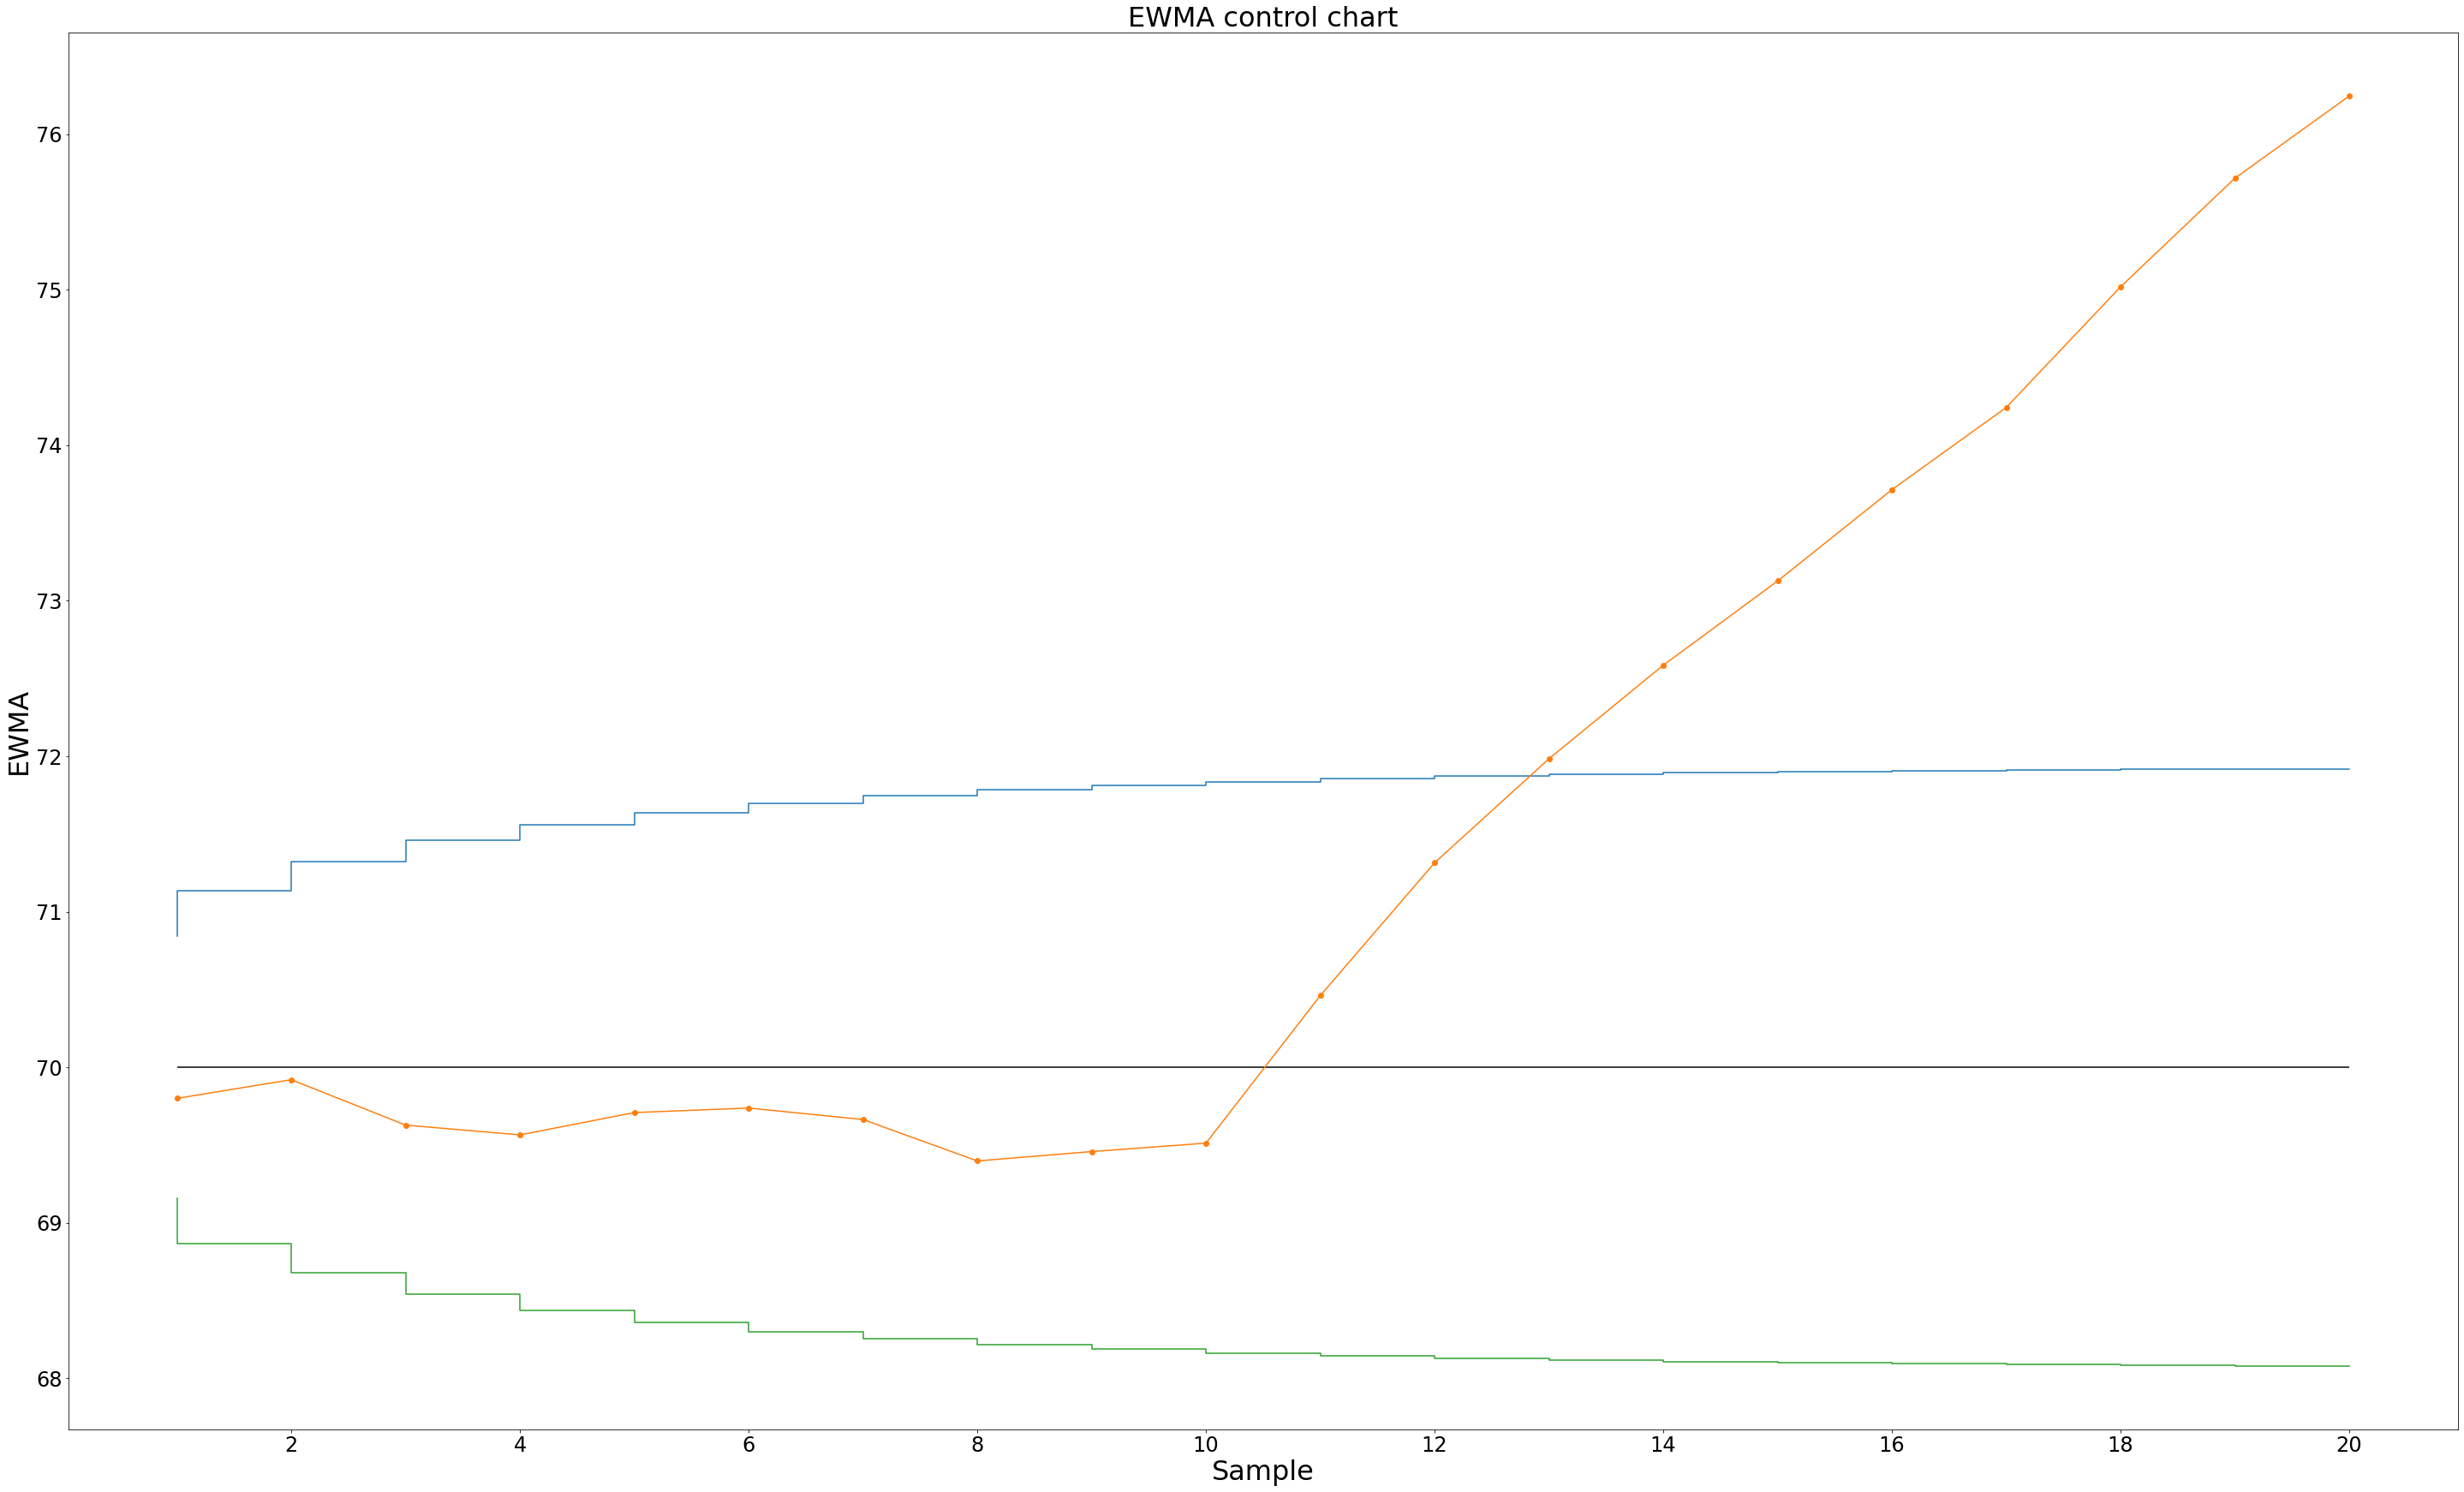

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

params = {'axes.titlesize':32, 'xtick.labelsize':24, 'ytick.labelsize':24, 'axes.labelsize': 32, 'axes.titlesize': 32}
matplotlib.rcParams.update(params)

plt.figure(figsize=(50, 30))
sample = np.arange(20) + 1
plt.hlines(mu, 1, 20, color="black")
plt.step(sample, UCL_a)
plt.plot(sample, z_t, marker = "o")
plt.step(sample, LCL_a)
plt.title('EWMA control chart')
plt.xlabel('Sample')
plt.ylabel('EWMA')
plt.xticks(np.arange(2, 21, 2))
None

可以看出前12筆data是in comtrol，但是後面的data都out of control。

## (b) (5%) Construct an EWMA control chart with 𝜆=0.5. Use 𝐿=3.07. Compare your results to those in part (a).

In [ ]:
import numpy as np

x_t = np.array([68,71,67,69,71,70,69,67,70,70,79,79,78,78,78,79,79,82,82,81])
mu = 70
sigma = 3
lamb = 0.5
L = 3.07
mu_0 = np.mean(x_t)

z_t = np.empty(len(x_t))
for i in range(len(x_t)):
    if i != 0:
        z_t[i] = lamb * x_t[i] + (1 - lamb) * z_t[i - 1]
    else:
        z_t[i] = lamb * x_t[0] + (1 - lamb) * mu

LCL_b = np.empty(len(x_t))
UCL_b = np.empty(len(x_t))
for i in range(len(x_t)):
    LCL_b[i] = mu - L * sigma * np.sqrt((lamb / (2 - lamb)) * (1 - (1 - lamb) ** (2 * (i + 1))))
    UCL_b[i] = mu + L * sigma * np.sqrt((lamb / (2 - lamb)) * (1 - (1 - lamb) ** (2 * (i + 1))))

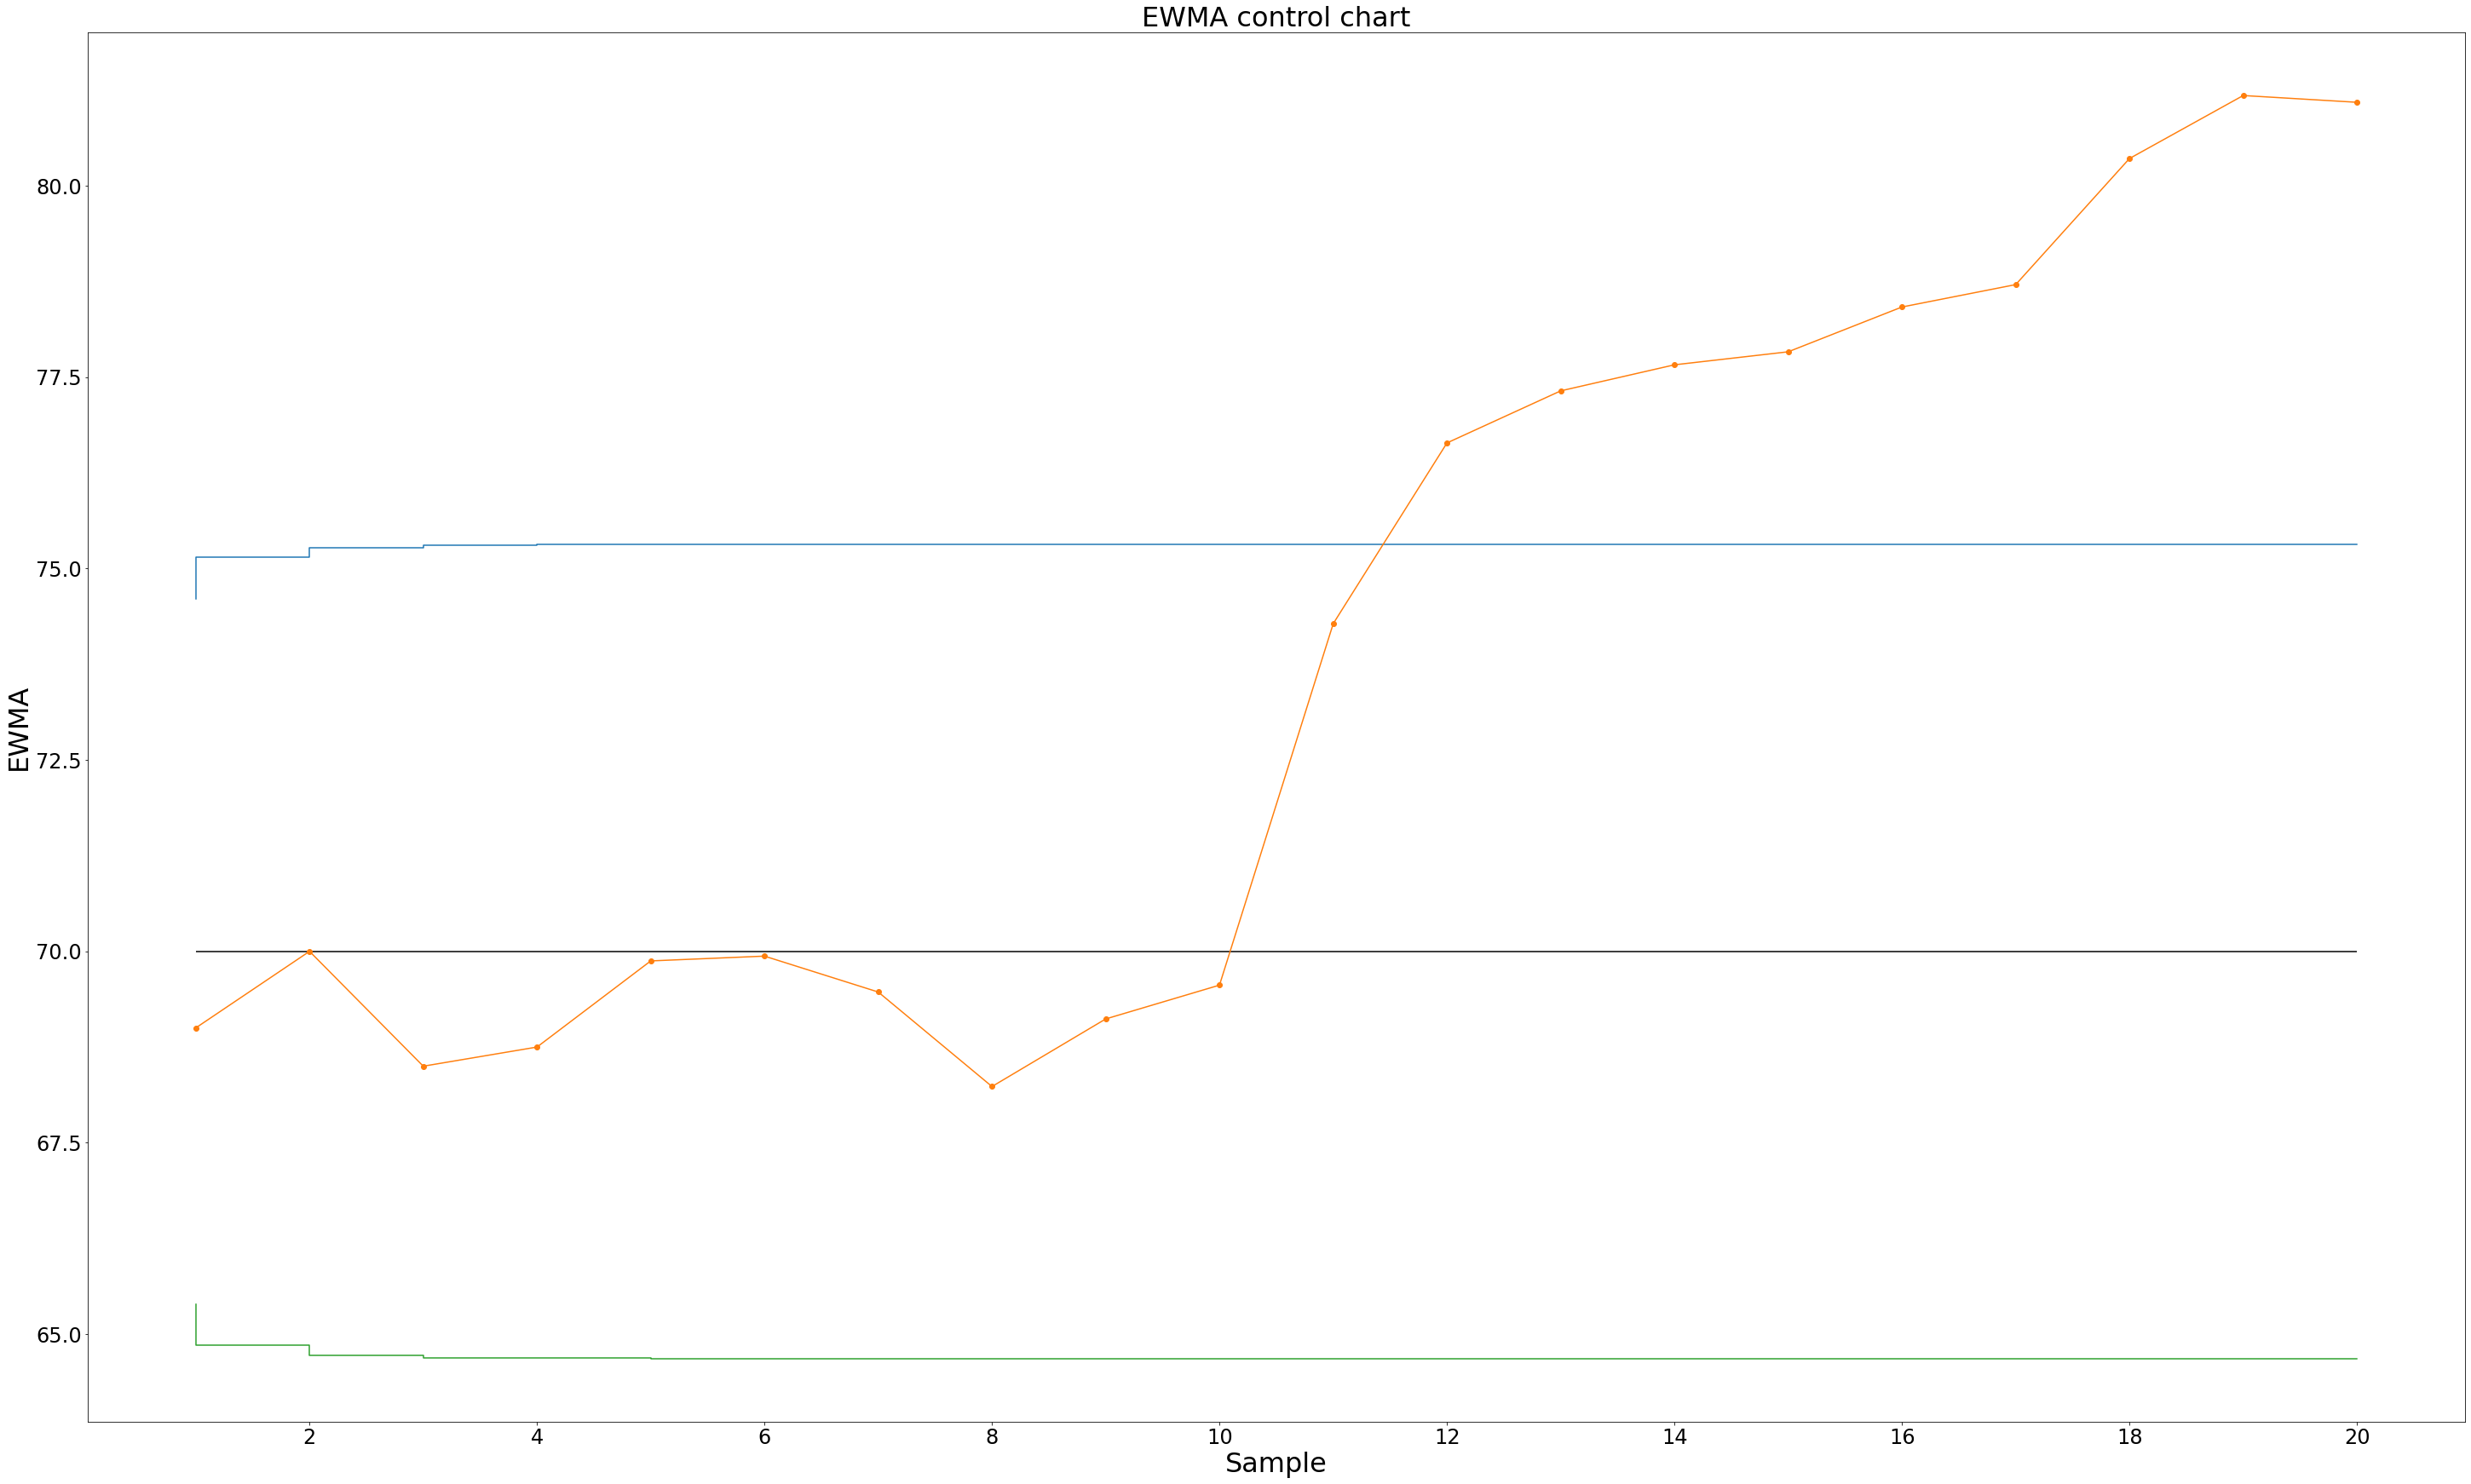

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

params = {'axes.titlesize':32, 'xtick.labelsize':24, 'ytick.labelsize':24, 'axes.labelsize': 32, 'axes.titlesize': 32}
matplotlib.rcParams.update(params)

plt.figure(figsize=(50, 30))
sample = np.arange(20) + 1
plt.hlines(mu, 1, 20, color="black")
plt.step(sample, UCL_b)
plt.plot(sample, z_t, marker = "o")
plt.step(sample, LCL_b)
plt.title('EWMA control chart')
plt.xlabel('Sample')
plt.ylabel('EWMA')
plt.xticks(np.arange(2, 21, 2))
None

因為不同的lambda會帶來不同的z<sub>i</sub>，所以b小題的ewma的範圍比較廣，也造成了只剩11個點是in control。

## (c) (5%) If the heart rate mean shifts to 76, approximate the ARLs for the charts in parts (a) and (b).

### For part (a)

In [ ]:
from scipy.stats import norm

p_a = 1 - (norm(76, 3).cdf(UCL_a[-1]) - norm(76, 3).cdf(LCL_a[-1]))
print(f'The ARL is {1 / p_a}')

The ARL is 1.0902135986818622


### For part (b)

In [ ]:
p_b = 1 - (norm(76, 3).cdf(UCL_b[-1]) - norm(76, 3).cdf(LCL_b[-1]))
print(f'The ARL is {1 / p_b}')

The ARL is 1.6946946109342471


## (d) (5%) What’s the probability that the control chart detects a shift to 76 on the first sample following the shift.

### For part(a)

In [ ]:
print(f'The probability is {p_a}')

The probability is 0.917251446146942


### For part (b)

In [ ]:
print(f'The probability is {p_b}')

The probability is 0.5900768159336521


## (e) (10%) What is the probability that the control chart does not detect a shift to 76 on the first sample following the shift, but does detect it on the second sample?

### For part (a)

In [ ]:
print(f'The probability is {(1 - p_a) * p_a}')

The probability is 0.07590123068828557


### For part (b)

In [ ]:
print(f'The probability is {(1 - p_b) * p_b}')

The probability is 0.24188616723125494


# 2. (30%) Prognostics and Health Management (PHM)

## (a) (5%) RUL Calculation: calculate remaining useful life (RUL) for each engine (different unit number) (hint: use the max time (in cycles) minus the current time, and create the remain useful life column). In fact, this is the task of “labelling” for supervised learning.

In [ ]:
import pandas as pd

columns = ['unit number', 'time, in cycles', 'operational setting 1', 'operational setting 2', 'operational setting 3', 'sensor measurement 1', 'sensor measurement 2',
            'sensor measurement 3', 'sensor measurement 4', 'sensor measurement 5', 'sensor measurement 6', 'sensor measurement 7', 'sensor measurement 8',
            'sensor measurement 9', 'sensor measurement 10', 'sensor measurement 11', 'sensor measurement 12', 'sensor measurement 13', 'sensor measurement 14',
            'sensor measurement 15', 'sensor measurement 16', 'sensor measurement 17', 'sensor measurement 18', 'sensor measurement 19', 'sensor measurement 20',
            'sensor measurement 21']

train_data = pd.read_csv("./drive/MyDrive/Homework/Manufacturing Data Science/HW4/train.txt", sep=" ", header=None)
train_data = train_data.drop([26, 27], axis=1)
train_data.columns = columns
test_data = pd.read_csv("./drive/MyDrive/Homework/Manufacturing Data Science/HW4/test.txt", sep=" ", header=None)
test_data = test_data.drop([26, 27], axis=1)
test_data.columns = columns

train_data.head()

,unit number,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,sensor measurement 6,sensor measurement 7,sensor measurement 8,sensor measurement 9,sensor measurement 10,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,2222.86,8343.91,1.02,41.92,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,13.65,334.82,2323.85,8721.53,1.08,44.26,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,5.71,138.24,2211.80,8314.56,1.02,41.79,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


In [ ]:
test_data.head()

,unit number,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,sensor measurement 6,sensor measurement 7,sensor measurement 8,sensor measurement 9,sensor measurement 10,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,0.0016,0.0002,100.0,518.67,642.88,1587.21,1412.44,14.62,21.61,553.33,2388.12,9042.41,1.30,47.57,521.44,2388.10,8124.04,8.4363,0.03,393,2388,100.00,38.97,23.3029
1,1,2,24.9993,0.6215,80.0,462.54,536.45,1262.64,1055.44,7.05,9.02,175.04,1915.12,7983.34,0.94,36.81,164.32,2027.95,7865.20,10.8935,0.02,308,1915,84.93,14.29,8.6686
2,1,3,0.0004,0.0000,100.0,518.67,642.65,1589.75,1409.54,14.62,21.61,554.31,2388.18,9037.61,1.30,47.49,521.15,2388.19,8121.12,8.4620,0.03,393,2388,100.00,38.91,23.2693
3,1,4,10.0034,0.2500,20.0,489.05,604.44,1499.93,1315.34,10.52,15.49,393.88,2318.94,8761.83,1.26,45.41,371.42,2388.21,8123.53,8.6815,0.03,369,2319,100.00,28.60,17.0930
4,1,5,0.0024,0.0011,100.0,518.67,642.74,1585.47,1408.12,14.62,21.61,553.53,2388.13,9041.98,1.30,47.66,520.86,2388.13,8118.30,8.4617,0.03,392,2388,100.00,38.82,23.3124


In [ ]:
RUL = []
for i in range(218):
    lifetime = train_data[train_data["unit number"]==(i + 1)].iloc[-1]['time, in cycles']
    time = train_data[train_data["unit number"]==(i + 1)].iloc[:]['time, in cycles'].values
    RUL += (lifetime - time).astype(int).tolist()
train_data.insert(2, "RUL", RUL, True)
train_data

,unit number,"time, in cycles",RUL,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,sensor measurement 6,sensor measurement 7,sensor measurement 8,sensor measurement 9,sensor measurement 10,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,222,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735
1,1,2,221,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619
2,1,3,220,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,2222.86,8343.91,1.02,41.92,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555
3,1,4,219,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,13.65,334.82,2323.85,8721.53,1.08,44.26,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832
4,1,5,218,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,5.71,138.24,2211.80,8314.56,1.02,41.79,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,4,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,5.72,137.97,2211.33,8303.20,1.02,42.68,130.21,2387.39,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985
45914,218,130,3,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,5.71,137.56,2211.29,8302.69,1.02,42.62,130.24,2387.28,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741
45915,218,131,2,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,5.72,138.05,2211.24,8309.41,1.02,42.83,129.86,2387.33,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978
45916,218,132,1,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,8.00,194.59,2222.54,8330.67,1.02,42.61,182.03,2387.56,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761


In [ ]:
RUL = []
for i in range(218):
    lifetime = test_data[test_data["unit number"]==(i + 1)].iloc[-1]['time, in cycles']
    time = test_data[test_data["unit number"]==(i + 1)].iloc[:]['time, in cycles'].values
    RUL += (lifetime - time).astype(int).tolist()
test_data.insert(2, "RUL", RUL, True)
test_data

,unit number,"time, in cycles",RUL,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,sensor measurement 6,sensor measurement 7,sensor measurement 8,sensor measurement 9,sensor measurement 10,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,53,0.0016,0.0002,100.0,518.67,642.88,1587.21,1412.44,14.62,21.61,553.33,2388.12,9042.41,1.30,47.57,521.44,2388.10,8124.04,8.4363,0.03,393,2388,100.00,38.97,23.3029
1,1,2,52,24.9993,0.6215,80.0,462.54,536.45,1262.64,1055.44,7.05,9.02,175.04,1915.12,7983.34,0.94,36.81,164.32,2027.95,7865.20,10.8935,0.02,308,1915,84.93,14.29,8.6686
2,1,3,51,0.0004,0.0000,100.0,518.67,642.65,1589.75,1409.54,14.62,21.61,554.31,2388.18,9037.61,1.30,47.49,521.15,2388.19,8121.12,8.4620,0.03,393,2388,100.00,38.91,23.2693
3,1,4,50,10.0034,0.2500,20.0,489.05,604.44,1499.93,1315.34,10.52,15.49,393.88,2318.94,8761.83,1.26,45.41,371.42,2388.21,8123.53,8.6815,0.03,369,2319,100.00,28.60,17.0930
4,1,5,49,0.0024,0.0011,100.0,518.67,642.74,1585.47,1408.12,14.62,21.61,553.53,2388.13,9041.98,1.30,47.66,520.86,2388.13,8118.30,8.4617,0.03,392,2388,100.00,38.82,23.3124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29815,218,86,4,35.0013,0.8404,60.0,449.44,556.14,1367.80,1129.58,5.48,8.00,193.42,2222.90,8342.83,1.02,42.04,182.99,2388.01,8065.66,9.3426,0.02,335,2223,100.00,14.62,8.8457
29816,218,87,3,25.0041,0.6200,80.0,462.54,536.97,1262.93,1051.83,7.05,9.03,175.27,1915.34,8007.53,0.94,36.89,164.96,2028.18,7871.94,10.9421,0.02,306,1915,84.93,14.41,8.4964
29817,218,88,2,20.0043,0.7000,0.0,491.19,607.93,1492.15,1252.99,9.35,13.66,333.62,2324.06,8723.49,1.08,44.53,314.86,2388.09,8059.65,9.2862,0.02,368,2324,100.00,24.42,14.5244
29818,218,89,1,20.0037,0.7000,0.0,491.19,607.85,1490.80,1254.70,9.35,13.66,333.77,2324.00,8720.59,1.08,44.55,314.86,2388.09,8062.13,9.2599,0.02,365,2324,100.00,24.45,14.5694


## (b) (5%) Variation Analysis: calculate the coefficient of variation (the ratio of the standard deviation to the mean) of each sensor. Which sensor shows maximum and minimum coefficient of variation, respectively? What’s the insight you can provide? (hint: variance implies information content)

In [ ]:
train_data = train_data[train_data["unit number"]==1]
var = []
sensor_data = train_data.iloc[:, 6:]
for i, col in enumerate(sensor_data):
    temp = sensor_data[col].std() / sensor_data[col].mean()
    var.append(temp)
    print(f'The coefficient of variation of sensor {i + 1} is {temp}')

The coefficient of variation of sensor 1 is 0.053822044790703835
The coefficient of variation of sensor 2 is 0.06387504721259663
The coefficient of variation of sensor 3 is 0.07566574898216205
The coefficient of variation of sensor 4 is 0.09949157194636565
The coefficient of variation of sensor 5 is 0.44734159686048125
The coefficient of variation of sensor 6 is 0.469648781189111
The coefficient of variation of sensor 7 is 0.5281573370034636
The coefficient of variation of sensor 8 is 0.07150062843370068
The coefficient of variation of sensor 9 is 0.040031688062864744
The coefficient of variation of sensor 10 is 0.11755946180470754
The coefficient of variation of sensor 11 is 0.08016627255406791
The coefficient of variation of sensor 12 is 0.5291416815397664
The coefficient of variation of sensor 13 is 0.06251761677191525
The coefficient of variation of sensor 14 is 0.011445721981227792
The coefficient of variation of sensor 15 is 0.08579184891255896
The coefficient of variation of sen

Maximum coefficient of variation: sensor 12

Minimum coefficient of variation: sensor 14

可以比較不同單位的資料，較大的coefficient of variation也就代表資料的較為分散；較小的coefficient of variation代表資料較為集中。


## (c) (5%) Feature Engineering: feature engineering is used to derive more features for prediction. In time domain, calculate the “moving” average/ variance/ peak value (max value) of each sensor respectively, by using predetermined length of the time window (eg. In unit number 1: calculate (0 to 10), (1 to 11), (2 to 13)...if the time window equal to 11 cycles). You don’t need to consider the end of time series which does not have enough cycles in the window.

### average

In [ ]:
avg = sensor_data.rolling(11).mean()[10:]
avg

,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,sensor measurement 6,sensor measurement 7,sensor measurement 8,sensor measurement 9,sensor measurement 10,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
10,479.492727,589.744545,1447.218182,1234.862727,8.849091,12.888182,319.251818,2264.042727,8605.084545,1.121818,43.683636,300.666364,2355.307273,8073.370000,9.143591,0.023636,354.727273,2264.090909,98.63,23.252727,13.919482
11,475.891818,585.355455,1434.590000,1218.566364,8.390909,12.207273,301.085455,2255.316364,8566.145455,1.100000,43.362727,283.508182,2355.290909,8068.184545,9.204155,0.022727,351.727273,2255.363636,98.63,21.990000,13.158145
12,469.194545,576.971818,1413.349091,1193.072727,7.417273,10.761818,263.396364,2239.295455,8500.276364,1.074545,42.894545,247.943636,2355.266364,8063.539091,9.291273,0.021818,346.090909,2239.363636,98.63,19.396364,11.610536
13,470.385455,575.317273,1403.770000,1186.574545,7.560000,10.854545,261.616364,2211.330000,8470.365455,1.067273,42.436364,246.250000,2322.556364,8045.943636,9.433118,0.021818,343.545455,2211.363636,97.26,19.346364,11.584436
14,470.190909,575.099091,1404.627273,1191.422727,7.666364,11.022727,267.080909,2210.880000,8474.870000,1.083636,42.539091,251.431818,2322.560909,8052.495455,9.380982,0.022727,344.000000,2210.909091,97.26,19.748182,11.793282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,464.704545,569.023636,1399.235455,1184.788182,7.120909,10.205455,243.634545,2198.012727,8426.764545,1.058182,42.582727,229.439091,2322.688182,8047.161818,9.560291,0.022727,342.363636,2197.909091,97.26,18.171818,10.865891
219,461.103636,564.580909,1387.273636,1168.439091,6.662727,9.523636,225.550000,2189.276364,8387.994545,1.036364,42.261818,212.385455,2322.670000,8041.810000,9.619736,0.021818,339.363636,2189.181818,97.26,16.931818,10.119873
220,467.397273,572.508182,1406.840909,1193.599091,7.493636,10.760909,258.054545,2204.292727,8453.642727,1.061818,42.801818,243.050000,2322.682727,8048.140909,9.541700,0.022727,344.636364,2204.181818,97.26,19.114545,11.405264
221,464.899091,569.238182,1397.484545,1179.282727,7.014545,10.038182,238.118182,2198.470000,8425.072727,1.040909,42.529091,224.282727,2322.692727,8041.859091,9.614809,0.022727,342.272727,2198.363636,97.26,17.821818,10.634400


### variance

In [ ]:
var = sensor_data.rolling(11).var()[10:]
var

,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,sensor measurement 6,sensor measurement 7,sensor measurement 8,sensor measurement 9,sensor measurement 10,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
10,972.937602,1784.615887,13112.479176,17298.732522,19.097529,42.957656,30502.100976,18783.201902,131490.482427,0.019236,10.615305,27128.288545,11767.039022,5701.124440,0.515771,0.000025,886.218182,18794.690909,20.64590,139.383522,49.848220
11,1039.856896,1857.615247,13415.555540,17527.989765,19.722489,44.160142,31109.729507,18568.271565,134024.482707,0.017840,10.536362,27668.359476,11765.860349,5455.479087,0.486569,0.000022,897.618182,18578.254545,20.64590,142.123640,50.773899
12,902.951247,1583.604476,11370.863149,14279.182722,16.807422,37.242196,25791.572645,16714.716467,112248.688205,0.013767,8.902407,22936.354445,11764.092585,5031.776469,0.414148,0.000016,760.090909,16725.454545,20.64590,119.118085,42.378800
13,866.795247,1692.165822,13332.316120,15752.723427,16.423200,36.773367,26094.539325,26328.624500,132379.507707,0.015222,12.193985,23208.918120,21181.497845,8425.728505,0.655574,0.000016,899.072727,26357.454545,37.16262,119.647885,42.544488
14,858.307229,1677.467349,13500.087822,16679.026742,16.966505,38.118822,27303.067269,26219.457200,135091.748580,0.018625,12.722209,24286.207756,21182.153209,8989.538667,0.709563,0.000022,921.800000,26247.090909,37.16262,125.909016,44.493973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,592.438487,1178.610985,9614.820687,12736.438256,10.415929,23.257767,16745.136467,22943.593362,98946.907287,0.013636,10.478022,14850.354949,21195.447376,7596.862876,0.623157,0.000022,678.254545,22968.690909,37.16262,74.455096,27.041954
219,542.205805,1039.011609,8352.561785,10479.217369,9.298882,20.429585,14404.417580,21455.668325,85274.666787,0.009185,9.205296,12763.876647,21192.824540,6972.733840,0.557484,0.000016,588.254545,21481.563636,37.16262,63.493496,23.038611
220,816.419542,1592.477936,12165.871029,16369.827529,14.731365,33.121529,23740.958207,25051.486762,126793.728082,0.015396,12.375096,21106.718200,21194.659482,7797.752589,0.663104,0.000022,855.054545,25072.563636,37.16262,104.991507,37.714022
221,603.274669,1196.003516,9195.861807,11252.386082,9.744987,21.617156,15206.081316,23068.195980,97805.634702,0.009249,10.050369,13543.019342,21196.103282,7036.546989,0.551199,0.000022,654.618182,23092.054545,37.16262,68.241856,24.512427


### peak value

In [ ]:
max = sensor_data.rolling(11).max()[10:]
max

,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,sensor measurement 6,sensor measurement 7,sensor measurement 8,sensor measurement 9,sensor measurement 10,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
10,518.67,642.70,1589.55,1407.59,14.62,21.61,553.90,2388.10,9051.35,1.3,47.50,521.81,2388.15,8133.29,10.8941,0.03,392.0,2388.0,100.0,38.99,23.3619
11,518.67,642.70,1589.55,1407.59,14.62,21.61,553.90,2388.10,9051.35,1.3,47.50,521.81,2388.15,8133.29,10.8941,0.03,392.0,2388.0,100.0,38.99,23.3619
12,518.67,642.70,1589.55,1407.59,14.62,21.61,553.90,2388.10,9051.35,1.3,47.50,521.74,2388.08,8133.29,10.8941,0.03,392.0,2388.0,100.0,38.99,23.2412
13,518.67,642.70,1589.55,1407.59,14.62,21.61,553.90,2388.10,9051.35,1.3,47.50,521.74,2388.08,8133.29,10.9160,0.03,392.0,2388.0,100.0,38.99,23.2412
14,518.67,642.70,1589.55,1407.59,14.62,21.61,553.90,2388.10,9051.35,1.3,47.50,521.74,2388.12,8133.29,10.9160,0.03,392.0,2388.0,100.0,38.99,23.2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,518.67,643.97,1597.91,1427.66,14.62,21.61,552.33,2388.23,9057.69,1.3,48.04,520.08,2388.35,8134.63,11.0199,0.03,395.0,2388.0,100.0,38.50,23.0440
219,518.67,643.97,1597.91,1427.66,14.62,21.61,552.33,2388.23,9057.69,1.3,48.04,520.08,2388.26,8134.63,11.0199,0.03,395.0,2388.0,100.0,38.50,23.0440
220,518.67,643.97,1597.91,1427.66,14.62,21.61,552.33,2388.23,9069.36,1.3,48.17,520.08,2388.28,8139.03,11.0199,0.03,395.0,2388.0,100.0,38.67,23.0440
221,518.67,643.88,1593.26,1425.82,14.62,21.61,551.14,2388.22,9069.36,1.3,48.17,520.04,2388.37,8139.03,11.0199,0.03,394.0,2388.0,100.0,38.67,23.0218


## (d) (5%) Feature Selection 1: do the similar moving average work to RUL column, then calculate the correlation coefficients between each generated feature (i.e. average, variance, and max value) and RUL column. Identify the Top 10 features which have high absolute value of correlation coefficients with RUL.

In [ ]:
gen_features = train_data['RUL'].rolling(11).mean()[10:]
for col in avg.columns:
    avg = avg.rename({col: 'avg_' + col}, axis=1)
for col in var.columns:
    var = var.rename({col: 'var_' + col}, axis=1)  
for col in max.columns:
    max = max.rename({col: 'max_' + col}, axis=1)  

gen_features = pd.concat([gen_features, avg, var, max], axis=1)
gen_features

,RUL,avg_sensor measurement 1,avg_sensor measurement 2,avg_sensor measurement 3,avg_sensor measurement 4,avg_sensor measurement 5,avg_sensor measurement 6,avg_sensor measurement 7,avg_sensor measurement 8,avg_sensor measurement 9,avg_sensor measurement 10,avg_sensor measurement 11,avg_sensor measurement 12,avg_sensor measurement 13,avg_sensor measurement 14,avg_sensor measurement 15,avg_sensor measurement 16,avg_sensor measurement 17,avg_sensor measurement 18,avg_sensor measurement 19,avg_sensor measurement 20,avg_sensor measurement 21,var_sensor measurement 1,var_sensor measurement 2,var_sensor measurement 3,var_sensor measurement 4,var_sensor measurement 5,var_sensor measurement 6,var_sensor measurement 7,var_sensor measurement 8,var_sensor measurement 9,var_sensor measurement 10,var_sensor measurement 11,var_sensor measurement 12,var_sensor measurement 13,var_sensor measurement 14,var_sensor measurement 15,var_sensor measurement 16,var_sensor measurement 17,var_sensor measurement 18,var_sensor measurement 19,var_sensor measurement 20,var_sensor measurement 21,max_sensor measurement 1,max_sensor measurement 2,max_sensor measurement 3,max_sensor measurement 4,max_sensor measurement 5,max_sensor measurement 6,max_sensor measurement 7,max_sensor measurement 8,max_sensor measurement 9,max_sensor measurement 10,max_sensor measurement 11,max_sensor measurement 12,max_sensor measurement 13,max_sensor measurement 14,max_sensor measurement 15,max_sensor measurement 16,max_sensor measurement 17,max_sensor measurement 18,max_sensor measurement 19,max_sensor measurement 20,max_sensor measurement 21
10,217.0,479.492727,589.744545,1447.218182,1234.862727,8.849091,12.888182,319.251818,2264.042727,8605.084545,1.121818,43.683636,300.666364,2355.307273,8073.370000,9.143591,0.023636,354.727273,2264.090909,98.63,23.252727,13.919482,972.937602,1784.615887,13112.479176,17298.732522,19.097529,42.957656,30502.100976,18783.201902,131490.482427,0.019236,10.615305,27128.288545,11767.039022,5701.124440,0.515771,0.000025,886.218182,18794.690909,20.64590,139.383522,49.848220,518.67,642.70,1589.55,1407.59,14.62,21.61,553.90,2388.10,9051.35,1.3,47.50,521.81,2388.15,8133.29,10.8941,0.03,392.0,2388.0,100.0,38.99,23.3619
11,216.0,475.891818,585.355455,1434.590000,1218.566364,8.390909,12.207273,301.085455,2255.316364,8566.145455,1.100000,43.362727,283.508182,2355.290909,8068.184545,9.204155,0.022727,351.727273,2255.363636,98.63,21.990000,13.158145,1039.856896,1857.615247,13415.555540,17527.989765,19.722489,44.160142,31109.729507,18568.271565,134024.482707,0.017840,10.536362,27668.359476,11765.860349,5455.479087,0.486569,0.000022,897.618182,18578.254545,20.64590,142.123640,50.773899,518.67,642.70,1589.55,1407.59,14.62,21.61,553.90,2388.10,9051.35,1.3,47.50,521.81,2388.15,8133.29,10.8941,0.03,392.0,2388.0,100.0,38.99,23.3619
12,215.0,469.194545,576.971818,1413.349091,1193.072727,7.417273,10.761818,263.396364,2239.295455,8500.276364,1.074545,42.894545,247.943636,2355.266364,8063.539091,9.291273,0.021818,346.090909,2239.363636,98.63,19.396364,11.610536,902.951247,1583.604476,11370.863149,14279.182722,16.807422,37.242196,25791.572645,16714.716467,112248.688205,0.013767,8.902407,22936.354445,11764.092585,5031.776469,0.414148,0.000016,760.090909,16725.454545,20.64590,119.118085,42.378800,518.67,642.70,1589.55,1407.59,14.62,21.61,553.90,2388.10,9051.35,1.3,47.50,521.74,2388.08,8133.29,10.8941,0.03,392.0,2388.0,100.0,38.99,23.2412
13,214.0,470.385455,575.317273,1403.770000,1186.574545,7.560000,10.854545,261.616364,2211.330000,8470.365455,1.067273,42.436364,246.250000,2322.556364,8045.943636,9.433118,0.021818,343.545455,2211.363636,97.26,19.346364,11.584436,866.795247,1692.165822,13332.316120,15752.723427,16.423200,36.773367,26094.539325,26328.624500,132379.507707,0.015222,12.193985,23208.918120,21181.497845,8425.728505,0.655574,0.000016,899.072727,26357.454545,37.16262,119.647885,42.544488,518.67,642.70,1589.55,1407.59,14.62,21.61,553.90,2388.10,9051.35,1.3,47.50,521.7

In [ ]:
RUL_corr = gen_features.corr(method='pearson')['RUL']
RUL_corr.abs().sort_values(ascending=False).head(11)

RUL                          1.000000
max_sensor measurement 13    0.856633
var_sensor measurement 3     0.314183
var_sensor measurement 17    0.309982
var_sensor measurement 9     0.307249
var_sensor measurement 10    0.302611
var_sensor measurement 11    0.301589
var_sensor measurement 4     0.299526
var_sensor measurement 21    0.290755
var_sensor measurement 7     0.289679
var_sensor measurement 12    0.289035
Name: RUL, dtype: float64

Top 10 features:


1.   max value of sensor 13 
2.   variance of sensor 3
3.   variance of sensor 17
4.   variance of sensor 9
5.   variance of sensor 10
6.   variance of sensor 11
7.   variance of sensor 4
8.   variance of sensor 21 
9.   variance of sensor 7
10.   variance of sensor 12



## (e) (5%) Feature Selection 2: Use random forest and identify the Top 10 important features (i.e. average, variance, and max value) with respect to the RUL column. Plot the line plot which x axis is cycle and y axis is these 10 important features.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=1)
rf.fit(gen_features.drop(['RUL'], axis=1), gen_features['RUL'])

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=1)

In [ ]:
def plot_features_weights(model, weights, feature_names):    

    (px, py) = (12, 15) 
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W_df = W.sort_values(by='Weights', ascending=True)
    W_df.tail(10).plot(kind='barh', color='r', figsize=(px,py), fontsize=12)
    plt.xlabel(model)
    plt.gca().yaxis.label.set_size(1)
    plt.rcParams.update({'font.size': 5})
    plt.gca().legend_ = None

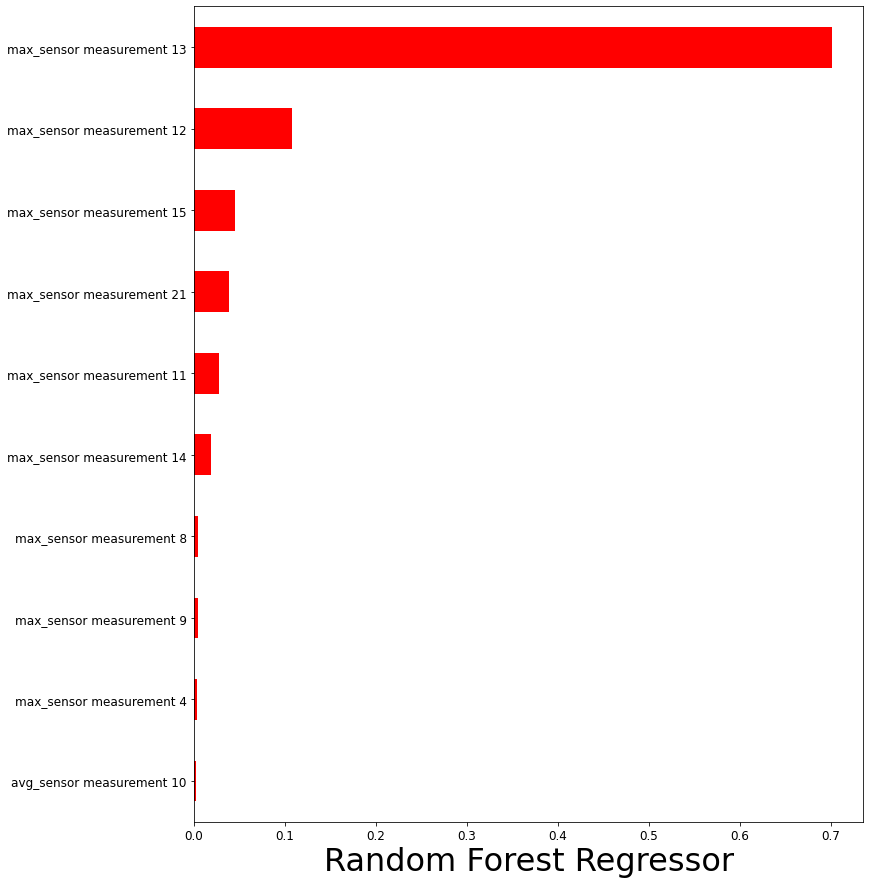

In [ ]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, gen_features.drop(['RUL'], axis=1).columns)

## (f) (5%送分題) Please “feel free” to read the two solutions shown in the following linkages when you are available. You don’t need to do any work about this question (f). 
Python solution: https://github.com/mustafashabbir10/Prognosis/blob/master/Prognosis.ipynb 

R solution: http://mkalikatzarakis.eu/wp-content/uploads/2018/12/code.html

# 3. Programming Questions (35%)

## (a) (5% 送 分 題 ) Learn Genetic Algorithm (GA) from the internet video https://www.youtube.com/watch?v=kHyNqSnzP8Y or https://www.youtube.com/watch?v=Fdk7ZKJHFcI .

## (b) (15%) Develop Tabu Search (TS) algorithm to solve the problem. Show your design and the “result”.

In [48]:
import time
import numpy as np
from copy import deepcopy

def TB(tabusize):
    #  Problem Definition and Parameters Setting
    p = np.array([10,10,13,4,9,4,8,15,7,1,9,3,15,9,11,6,5,14,18,3])
    d = np.array([50,38,49,12,20,105,73,45,6,64,15,6,92,43,78,21,15,50,150,99])
    w = np.array([10,5,1,5,10,1,5,10,5,1,5,10,10,5,1,10,5,5,1,5])

    Num_Jobs = len(p)

    print('The tabusize is', tabusize)

    Num_Iteration = 100
    print('The iteration is', Num_Iteration)

    tabulist = np.zeros((tabusize, 2), dtype=int)
    Tbest = 9999999999

    start_time = time.time()

    for i in range(Num_Iteration):
        if i == 0: # Initialize the Solution
            # x_now is the row vector containing a random permutation of the
            # integers from 1 to Num_Jobs
            x_now = np.random.permutation(range(Num_Jobs))
            Ptime = 0
            Tardiness = 0
            
            # According to the job sequence x_now, we accumulate the process to Ptime
            # And then calculate the tardiness
            for j in range(Num_Jobs):  
                Ptime += p[x_now[j]]
                Tardiness += w[x_now[j]] * max(Ptime - d[x_now[j]], 0)
            # After for-loop calculation, we get the initial solution(x_now=x_best=x0)
            T_now_best = Tardiness
            
        # Starting the intensification step, we regenerate a new job sequence
        # based on previous situation(tabulist) and try to find the new solution
        else: # Neighborhood Search
            T_now_best = 9999999999

            for k in range(Num_Jobs - 1): 
                istabu = 0
                x_next = deepcopy(x_now)
                x_next[k] = x_now[k + 1]
                x_next[k + 1] = x_now[k]
                for n in range(tabusize): 
                    if x_next[k] == tabulist[n, 0] and x_next[k + 1] == tabulist[n, 1]:
                        istabu = 1
                    if x_next[k] == tabulist[n, 1] and x_next[k + 1] == tabulist[n, 0]:
                        istabu = 1
                if istabu == 0:
                    Ptime = 0
                    Tardiness = 0
                    for j in range(Num_Jobs):
                        Ptime += p[x_next[j]]
                        Tardiness += w[x_next[j]] * max(Ptime - d[x_next[j]], 0)
                    if Tardiness < T_now_best:
                        T_now_best = Tardiness
                        jobsequence = x_next
                        t1 = x_next[k]
                        t2 = x_next[k+1]
            x_now = jobsequence

            # Update the Tabu List
            for n in range(tabusize - 1, 0, -1): 
                tabulist[n, 0] = tabulist[(n - 1), 0]
                tabulist[n,1] = tabulist [(n - 1), 1]
            tabulist[0, 0] = t1
            tabulist[0, 1] = t2 
            
            # Update the Best Result of All Iterations
            if T_now_best <= Tbest:
                Tbest = T_now_best
                x_best = x_now


    # Calculate the Tardy Job Counts
    jobsequence_ptime = 0
    num_tardy = 0
    for l in range(Num_Jobs): 
        jobsequence_ptime += p[x_best[l]]  
        if jobsequence_ptime > d[x_best[l]]:  
            num_tardy += 1

    # Report the Results
    print('--------- Final Report ---------')
    print('Optimal Solution (i.e., job sequence)= ',  x_best + 1) 
    print('Optimal function (i.e., fitness) Value : ', Tbest)
    print('Running time:%.10f'%(time.time() - start_time))
    print('Average (Weighted) Tardiness :%.2f'%(Tbest/Num_Jobs))
    print('Number of tardy jobs : %d'%num_tardy)

In [49]:
TB(2)

The tabusize is 2
The iteration is 100
--------- Final Report ---------
Optimal Solution (i.e., job sequence)=  [12 11 17 16  5  2  1  9 10  8  7 13 20  4 14 18  6 15  3 19]
Optimal function (i.e., fitness) Value :  2308
Running time:0.0855245590
Average (Weighted) Tardiness :115.40
Number of tardy jobs : 17


In [50]:
TB(3)

The tabusize is 3
The iteration is 100
--------- Final Report ---------
Optimal Solution (i.e., job sequence)=  [12  4  5 16 17  8  1  9 14 10 11 13 20  7  2 18  6 15  3 19]
Optimal function (i.e., fitness) Value :  1958
Running time:0.0919840336
Average (Weighted) Tardiness :97.90
Number of tardy jobs : 15


In [52]:
TB(6)

The tabusize is 6
The iteration is 100
--------- Final Report ---------
Optimal Solution (i.e., job sequence)=  [12  9  4 16  5 17  8  1 14 10  7 13 20 11  2 18  6 15  3 19]
Optimal function (i.e., fitness) Value :  1933
Running time:0.1503109932
Average (Weighted) Tardiness :96.65
Number of tardy jobs : 16


## (c) (15%) Develop Genetic Algorithm (GA) to solve the problem. Show your design and the “result”.

In [57]:
import numpy as np
import time
import copy

def GA(population_size, crossover_rate, mutation_rate, num_iteration):
    ''' ================= initialization setting ======================'''
    np.random.seed(23)
    num_job=20 # number of jobs

    p=[10,10,13,4,9,4,8,15,7,1,9,3,15,9,11,6,5,14,18,3]
    d=[50,38,49,12,20,105,73,45,6,64,15,6,92,43,78,21,15,50,150,99]
    w=[10,5,1,5,10,1,5,10,5,1,5,10,10,5,1,10,5,5,1,5]

    mutation_selection_rate = 0.5
    num_mutation_jobs = round(num_job * mutation_selection_rate)
    start_time = time.time()

    '''==================== main code ==============================='''
    '''----- generate initial population -----'''
    Tbest=999999999999999
    best_list,best_obj=[],[]
    population_list=[]
    for i in range(population_size):
        random_num=list(np.random.permutation(num_job)) # generate a random permutation of 0 to num_job-1
        population_list.append(random_num) # add to the population_list
            
    for n in range(num_iteration):
        Tbest_now=99999999999           
        '''-------- crossover --------'''
        parent_list=copy.deepcopy(population_list)
        offspring_list=copy.deepcopy(population_list)
        S=list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover
        
        for m in range(int(population_size/2)):
            crossover_prob=np.random.rand()
            if crossover_rate>=crossover_prob:
                parent_1= population_list[S[2*m]][:]
                parent_2= population_list[S[2*m+1]][:]
                child_1=['na' for i in range(num_job)]
                child_2=['na' for i in range(num_job)]
                fix_num=round(num_job/2)
                g_fix=list(np.random.choice(num_job, fix_num, replace=False))
                
                for g in range(fix_num):
                    child_1[g_fix[g]]=parent_2[g_fix[g]]
                    child_2[g_fix[g]]=parent_1[g_fix[g]]
                c1=[parent_1[i] for i in range(num_job) if parent_1[i] not in child_1]
                c2=[parent_2[i] for i in range(num_job) if parent_2[i] not in child_2]
                
                for i in range(num_job-fix_num):
                    child_1[child_1.index('na')]=c1[i]
                    child_2[child_2.index('na')]=c2[i]
                offspring_list[S[2*m]]=child_1[:]
                offspring_list[S[2*m+1]]=child_2[:]
            
        '''--------mutatuon--------'''   
        for m in range(len(offspring_list)):
            mutation_prob=np.random.rand()
            if mutation_rate >= mutation_prob:
                m_chg=list(np.random.choice(num_job, num_mutation_jobs, replace=False)) # chooses the position to mutation
                t_value_last=offspring_list[m][m_chg[0]] # save the value which is on the first mutation position
                for i in range(num_mutation_jobs-1):
                    offspring_list[m][m_chg[i]]=offspring_list[m][m_chg[i+1]] # displacement
                
                offspring_list[m][m_chg[num_mutation_jobs-1]]=t_value_last # move the value of the first mutation position to the last mutation position
        
        
        '''--------fitness value(calculate tardiness)-------------'''
        total_chromosome=copy.deepcopy(parent_list)+copy.deepcopy(offspring_list) # parent and offspring chromosomes combination
        chrom_fitness,chrom_fit=[],[]
        total_fitness=0
        for i in range(population_size*2):
            ptime=0
            tardiness=0
            for j in range(num_job):
                ptime=ptime+p[total_chromosome[i][j]]
                tardiness=tardiness+w[total_chromosome[i][j]]*max(ptime-d[total_chromosome[i][j]],0)
            chrom_fitness.append(1/tardiness)
            chrom_fit.append(tardiness)
            total_fitness=total_fitness+chrom_fitness[i]
        
        '''----------selection----------'''
        pk,qk=[],[]
        
        for i in range(population_size*2):
            pk.append(chrom_fitness[i]/total_fitness)
        for i in range(population_size*2):
            cumulative=0
            for j in range(0,i+1):
                cumulative=cumulative+pk[j]
            qk.append(cumulative)
        
        selection_rand=[np.random.rand() for i in range(population_size)]
        
        for i in range(population_size):
            if selection_rand[i]<=qk[0]:
                population_list[i]=copy.deepcopy(total_chromosome[0])
            else:
                for j in range(0,population_size*2-1):
                    if selection_rand[i]>qk[j] and selection_rand[i]<=qk[j+1]:
                        population_list[i]=copy.deepcopy(total_chromosome[j+1])
                        break
        '''----------comparison----------'''
        for i in range(population_size*2):
            if chrom_fit[i]<Tbest_now:
                Tbest_now=chrom_fit[i]
                sequence_now=copy.deepcopy(total_chromosome[i])
        
        if Tbest_now<=Tbest:
            Tbest=Tbest_now
            sequence_best=copy.deepcopy(sequence_now)
        
        job_sequence_ptime=0
        num_tardy=0
        for k in range(num_job):
            job_sequence_ptime=job_sequence_ptime+p[sequence_best[k]]
            if job_sequence_ptime>d[sequence_best[k]]:
                num_tardy += 1
    '''----------result----------'''
    print('--------- Final Report ---------')
    print('Optimal Solution (i.e., job sequence)= ', [i + 1 for i in sequence_best]) 
    print('Optimal function (i.e., fitness) Value : ', Tbest)
    print('Running time:%.10f'%(time.time() - start_time))
    print('Average (Weighted) Tardiness :%.2f'%(Tbest/Num_Jobs))
    print('Number of tardy jobs : %d'%num_tardy)

In [58]:
population_size = 25
crossover_rate =  0.6
mutation_rate = 0.05
num_iteration = 2000

GA(population_size, crossover_rate, mutation_rate, num_iteration)

--------- Final Report ---------
Optimal Solution (i.e., job sequence)=  [12, 4, 5, 16, 17, 9, 8, 1, 11, 7, 10, 14, 13, 20, 18, 6, 2, 15, 3, 19]
Optimal function (i.e., fitness) Value :  1986
Running time:44.2980349064
Average (Weighted) Tardiness :99.30
Number of tardy jobs : 17


In [59]:
population_size = 30
crossover_rate =  0.6 
mutation_rate = 0.05
num_iteration = 2000

GA(population_size, crossover_rate, mutation_rate, num_iteration)

--------- Final Report ---------
Optimal Solution (i.e., job sequence)=  [12, 16, 4, 5, 17, 9, 1, 8, 11, 14, 10, 13, 20, 7, 2, 18, 15, 6, 3, 19]
Optimal function (i.e., fitness) Value :  1979
Running time:54.7252199650
Average (Weighted) Tardiness :98.95
Number of tardy jobs : 16


In [60]:
population_size = 30 
crossover_rate =  0.68
mutation_rate = 0.05
num_iteration = 2000

GA(population_size, crossover_rate, mutation_rate, num_iteration)

--------- Final Report ---------
Optimal Solution (i.e., job sequence)=  [12, 4, 17, 5, 16, 9, 11, 1, 10, 2, 14, 7, 8, 20, 13, 6, 18, 3, 19, 15]
Optimal function (i.e., fitness) Value :  2058
Running time:59.4475235939
Average (Weighted) Tardiness :102.90
Number of tardy jobs : 15


In [61]:
population_size = 30
crossover_rate =  0.68 
mutation_rate = 0.1
num_iteration = 2000

GA(population_size, crossover_rate, mutation_rate, num_iteration)

--------- Final Report ---------
Optimal Solution (i.e., job sequence)=  [12, 4, 16, 5, 17, 9, 8, 1, 14, 10, 7, 13, 20, 11, 2, 18, 6, 3, 15, 19]
Optimal function (i.e., fitness) Value :  1940
Running time:60.0135836601
Average (Weighted) Tardiness :97.00
Number of tardy jobs : 15


## (d) (5%) Please give a comparison between Tabu and GA. You may try different parameters to see the change of the results (i.e., sensitivity analysis) in your developed algorithm. What’s the “insight” or interesting things you found?

執行Tabu的時候，發現當Tabu size大一點，則得到的optimal function value會小一點，但也不能太大。而執行GA的時候，將crossover rate調大一點點、mutation rate調小一點點，則得到的optimal function value也會小一些。但跑完Tabu跟GA後發現最後得到的optimal function value是差不多的，不過GA所花費的時間較Tabu長不少，甚至Tabu得到的結果還優於GA一點，因此Tabu在Single Machine Scheduling Problem表現比較好，不過GA可調整的參數較多，所以也有可能是還沒找到最佳的參數。

# References



1.   https://github.com/wurmen/Genetic-Algorithm-for-Job-Shop-Scheduling-and-NSGA-II/blob/master/implementation%20with%20python/GA-flowshop/GA_flowshop_tardyjob.py
2.   https://github.com/csiebear/TabuSearch

